In [1]:
import xarray as xr
import numpy as np

In [2]:
data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')



In [3]:
data


<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 283817)
Coordinates:
  * latitude                 (latitude) float32 40.251
  * longitude                (longitude) float32 -73.164
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

In [4]:
data.air_temperature


<xarray.DataArray 'air_temperature' (time: 283817, latitude: 1, longitude: 1)>
[283817 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 40.251
  * longitude  (longitude) float32 -73.164
  * time       (time) datetime64[ns] 1975-10-24T12:00:00 ... 2021-01-31T23:50:00
Attributes:
    long_name:      Air Temperature
    short_name:     atmp
    standard_name:  air_temperature
    units:          degree_Celsius

In [5]:
data2 = data.sel(time=slice('2019-01-01','2020-01-01'))


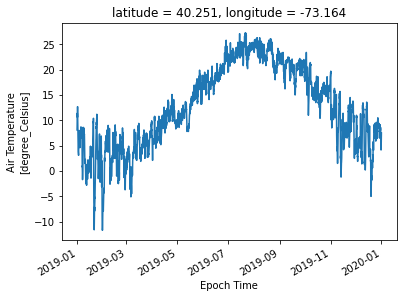

In [6]:
data2.air_temperature.plot();

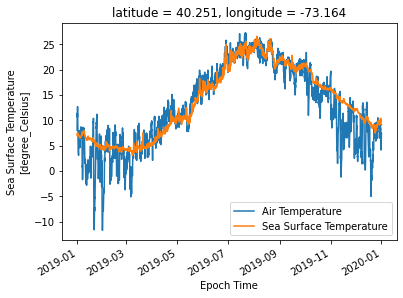

In [7]:

import matplotlib.pyplot as plt
data2.air_temperature.plot(label="Air Temperature")
data2.sea_surface_temperature.plot(label="Sea Surface Temperature")
plt.legend();

In [8]:
import stumpy

In [9]:
m = 50

In [10]:
import matplotlib.pyplot as plt

In [11]:
df = data2.to_dataframe().reset_index().set_index('time')
df.head()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2019-01-01 00:50:00,40.250999,-73.164001,135.0,11.3,14.1,1.56,00:00:05.559999,00:00:04.710000,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
2019-01-01 01:50:00,40.250999,-73.164001,127.0,11.2,14.0,1.92,00:00:05.880000,00:00:05.090000,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2019-01-01 02:50:00,40.250999,-73.164001,137.0,12.7,15.3,2.23,00:00:06.250000,00:00:05.219999,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN
2019-01-01 03:50:00,40.250999,-73.164001,150.0,13.7,16.9,2.52,00:00:06.670000,00:00:05.489999,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN
2019-01-01 04:50:00,40.250999,-73.164001,168.0,9.5,11.2,2.77,00:00:07.139999,00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN


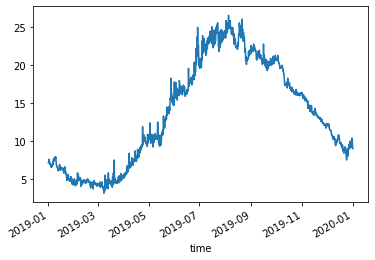

In [12]:
df.sea_surface_temperature.plot()

In [13]:
plt.figure(figsize=[20,5])

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

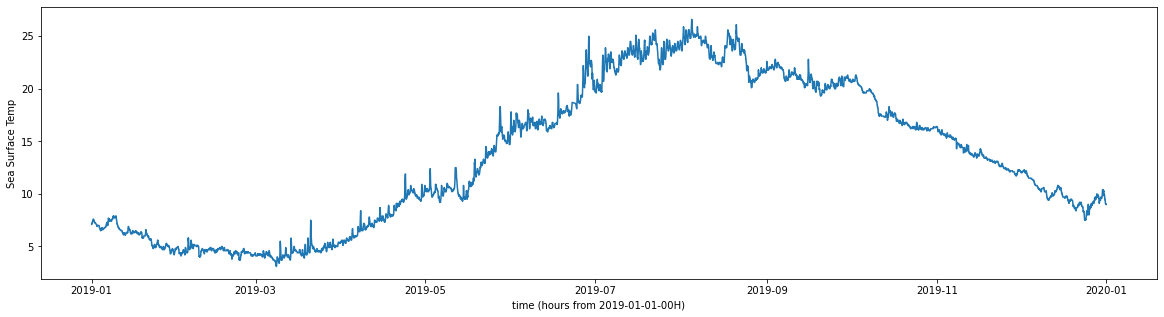

In [14]:
plt.figure(figsize=[20,5])
plt.plot(df.iloc[:,11])
plt.ylabel('Sea Surface Temp')
plt.xlabel('time (hours from 2019-01-01-00H)')
plt.show()

In [15]:
m = 100
mp = stumpy.stump(df.iloc[:,11],m) 

In [16]:
motif_idx = np.argsort(mp[:, 0])[0] #closest pair
nearest_neighbor_idx = mp[motif_idx, 1]

In [17]:
print(motif_idx,nearest_neighbor_idx)

169 7947


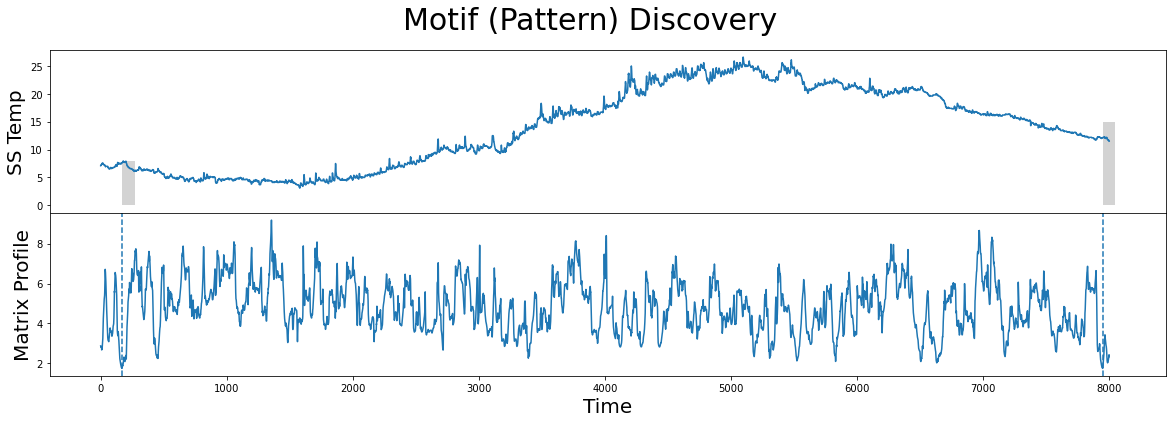

In [18]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df.iloc[0:8000,11].values)
axs[0].set_ylabel('SS Temp', fontsize='20')
rect = Rectangle((motif_idx-0, 0), m, 8, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx-0, 0), m, 15, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx-0, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx-0, linestyle="dashed")
axs[1].plot(mp[0:8000, 0])
plt.show()

In [19]:
data2 = data.sel(time=slice('2017-01-01','2020-01-01'))

In [20]:
data2

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 25768)
Coordinates:
  * latitude                 (latitude) float32 40.251
  * longitude                (longitude) float32 -73.164
  * time                     (time) datetime64[ns] 2017-01-01T00:50:00 ... 20...
Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

In [21]:
df = data2.to_dataframe().reset_index().set_index('time')
df.head()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2017-01-01 00:50:00,40.250999,-73.164001,215.0,14.7,19.400000,3.42,00:00:07.690000,00:00:06.199999,220.0,1013.900024,9.1,8.8,NaN,NaN,NaN
2017-01-01 01:50:00,40.250999,-73.164001,217.0,14.4,18.299999,3.47,00:00:07.690000,00:00:06.110000,225.0,1013.299988,9.1,8.8,NaN,NaN,NaN
2017-01-01 02:50:00,40.250999,-73.164001,228.0,14.9,18.700001,3.31,00:00:08.329999,00:00:06.170000,203.0,1013.000000,8.7,8.8,NaN,NaN,NaN
2017-01-01 03:50:00,40.250999,-73.164001,228.0,15.4,19.600000,3.81,00:00:08.329999,00:00:06.469999,219.0,1012.700012,8.9,8.8,NaN,NaN,NaN
2017-01-01 04:50:00,40.250999,-73.164001,231.0,13.9,16.299999,3.66,00:00:08.329999,00:00:06.449999,208.0,1012.599976,8.8,8.8,NaN,NaN,NaN


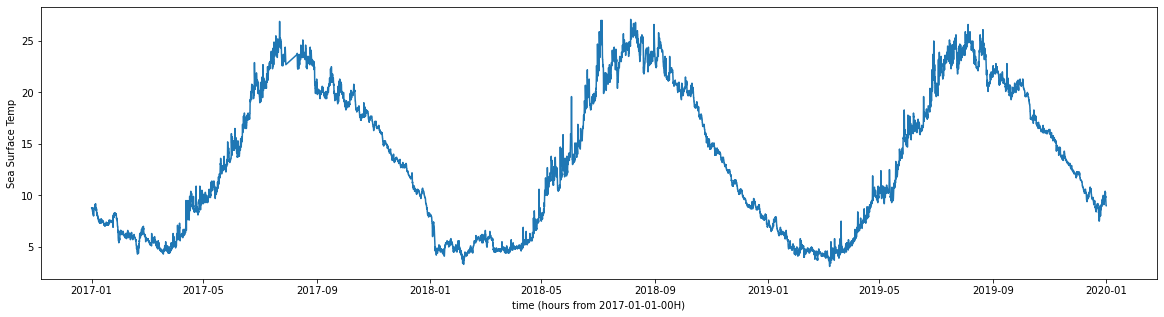

In [22]:
plt.figure(figsize=[20,5])
plt.plot(df.iloc[:,11])
plt.ylabel('Sea Surface Temp')
plt.xlabel('time (hours from 2017-01-01-00H)')
plt.show()

In [23]:
m = 168
mp = stumpy.stump(df.iloc[:,11],m) 

In [24]:
motif_idx = np.argsort(mp[:, 0])[0] #closest pair
nearest_neighbor_idx = mp[motif_idx, 1]

In [25]:
print(motif_idx,nearest_neighbor_idx)

23674 560


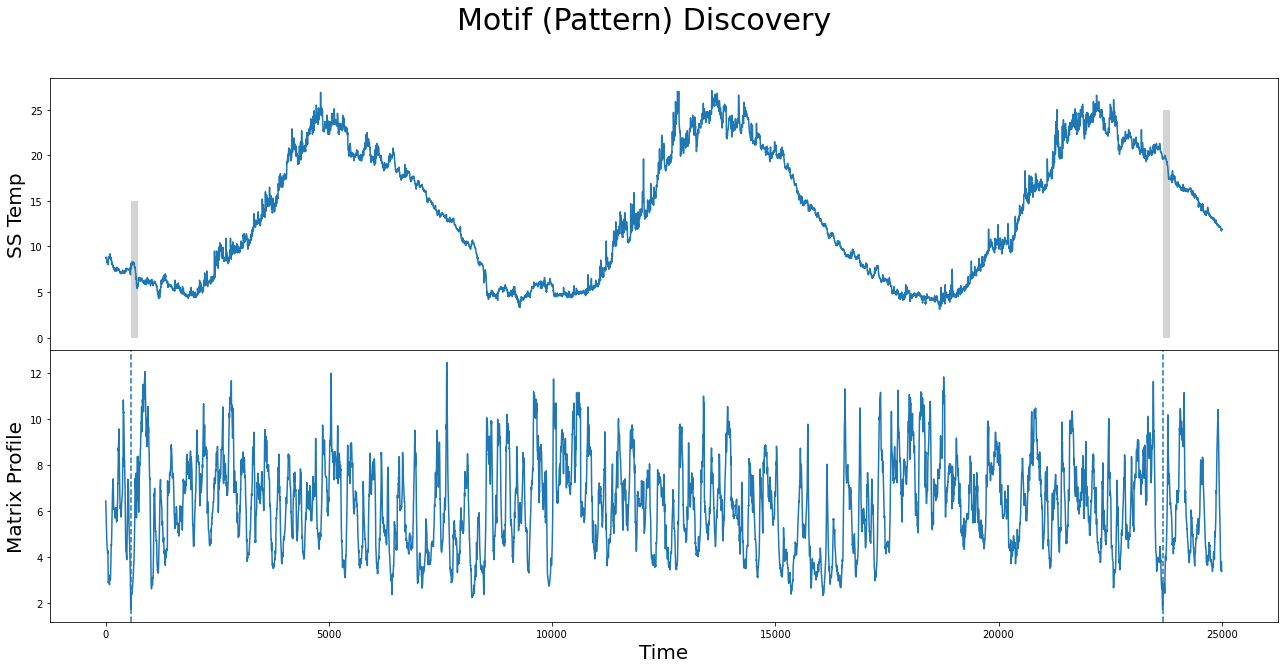

In [26]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [22, 10])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df.iloc[0:25000,11].values)
axs[0].set_ylabel('SS Temp', fontsize='20')
rect = Rectangle((motif_idx-0, 0), m, 25, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx-0, 0), m, 15, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx-0, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx-0, linestyle="dashed")
axs[1].plot(mp[0:25000, 0])
plt.show()

In [27]:
discord_idx = np.argsort(mp[:, 0])[-1]
nearest_neighbor_distance = mp[discord_idx, 0]

In [28]:
print(discord_idx,nearest_neighbor_distance)

7639 12.45645810484731


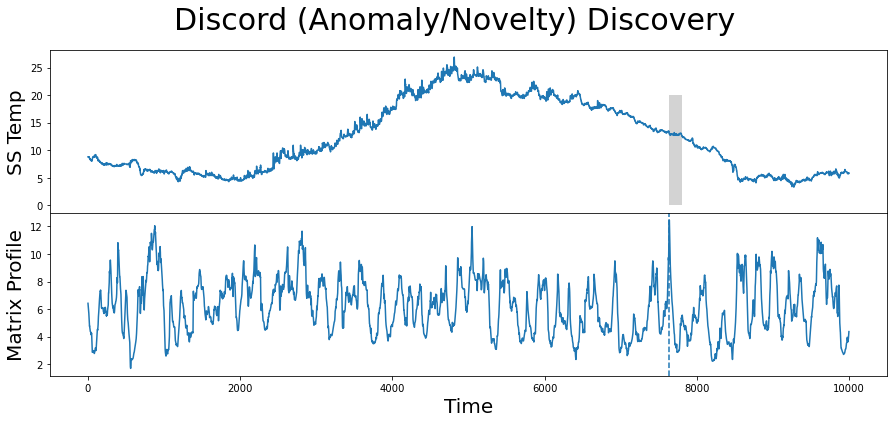

In [29]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [15, 6])
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df.iloc[0:10000,11].values)
axs[0].set_ylabel('SS Temp', fontsize='20')
rect = Rectangle((discord_idx-0, 0), m, 20, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx-0, linestyle="dashed")
axs[1].plot(mp[0:10000, 0])
plt.show()